# 1 - Comprendre l'outil Google Colab

Google Colab permet à n'importe qui d'écrire et d'exécuter du code Python dans le navigateur.

Un document s'appelle un notebook ; derrière eux se trouvent des serveurs Linux.

Les notebooks peuvent être vus comme une succession de cellules.

Et ces cellules peuvent contenir trois types de contenu :

- Du code Python
- Du code Bash : https://en.wikipedia.org/wiki/Bash_(Unix_shell)
- Du texte, mis en forme avec du Markdown : https://www.markdownguide.org/cheat-sheet/


# 2 - Installation

Pour ce TP, vous aurez besoin de Python 3. Vous pouvez vérifier la version de Python du serveur Linux derrière votre notebook en exécutant cette ligne de commande Bash : `!python --version`.


*Note : pour que Colab sache qu'il doit exécuter du Bash, ces commandes doivent toujours être précédées d'un point d'exclamation.*

In [13]:
!python --version

Python 3.9.0


Installez ensuite ces 3 paquets :

1. the Natural Language ToolKit (NLTK) : `pip install nltk`
2. Numpy : `pip install numpy`
3. Matplotlib : `pip install matplotlib`

In [14]:
!pip install nltk numpy matplotlib

You should consider upgrading via the '/Users/datalody/Git/cfg/.venv/bin/python -m pip install --upgrade pip' command.


In [85]:
!pip install pptree

  Created wheel for pptree: filename=pptree-3.1-py3-none-any.whl size=4629 sha256=8debd8550ca3ff3511d90f536cee9f9543b11688c3ebfd29c4ccc25935d47601
  Stored in directory: /Users/datalody/Library/Caches/pip/wheels/52/0e/51/514e690004ea9713bc3fdb678d5e2768fcc597d0c3b6a3abd2
Successfully built pptree
You should consider upgrading via the '/Users/datalody/Git/cfg/.venv/bin/python -m pip install --upgrade pip' command.


# 3 - Familiarisation avec l’outil

## 3.1 - Python

Lorsque vous créez une cellule Python, le notebook attend que vous rédigiez du code et l'exécutiez.

Commençons par utiliser Python comme calculette.

Pour exécuter une cellule de code, vous devez cliquer sur le bouton Play à gauche de votre cellule.

Essayez ci-dessous :

In [15]:
4 * 10 + 2

42

Essayez quelques autres calculs avec les opérateurs `+ - *` et `/` par exemple.

In [16]:
86 / 2 - 1

42.0

Voyons à présent ce qui se passe si l’on tape une expression illogique comme `1 +`:

In [17]:
1 +

SyntaxError: invalid syntax (<ipython-input-17-953e01372b97>, line 1)

Python renvoie une **erreur de syntaxe** issue du *standard input* (stdin).

## 3.2 - NLTK

Commençons par importer le module NLTK et par télécharger quelques données de test.



In [18]:
import nltk

nltk.download('book')

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/datalody/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/datalody/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /Users/datalody/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/datalody/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /Users/datalody/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /Users/datalody/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data

True

Tapez ensuite la commande suivante pour charger
les textes (cela prend quelques secondes) :

In [19]:
from nltk.book import *

Chaque texte porte un nom qui permet de l’invoquer :

In [20]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [21]:
text2

<Text: Sense and Sensibility by Jane Austen 1811>

Nous pouvons à présent explorer ce corpus, par exemple pour chercher toutes les occurrence de
l’adjectif monstrous (monstrueux) en contexte dans Moby Dick :

In [22]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


## 3.3 - Chart parser

In [27]:
from nltk import CFG

In [68]:
nltk.app.rdparser()

In [24]:
# Cette ligne de code ne fonctionne que si vous lancez le notebook en local (hors de Colab)
nltk.app.chartparser()

grammar= (
('    ', 'S -> NP VP,')
('    ', 'VP -> VP PP,')
('    ', 'VP -> V NP,')
('    ', 'VP -> V,')
('    ', 'NP -> Det N,')
('    ', 'NP -> NP PP,')
('    ', 'PP -> P NP,')
('    ', "NP -> 'John',")
('    ', "NP -> 'I',")
('    ', "Det -> 'the',")
('    ', "Det -> 'my',")
('    ', "Det -> 'a',")
('    ', "N -> 'dog',")
('    ', "N -> 'cookie',")
('    ', "N -> 'table',")
('    ', "N -> 'cake',")
('    ', "N -> 'fork',")
('    ', "V -> 'ate',")
('    ', "V -> 'saw',")
('    ', "P -> 'on',")
('    ', "P -> 'under',")
('    ', "P -> 'with',")
)
tokens = ['John', 'ate', 'the', 'cake', 'on', 'the', 'table']
Calling "ChartParserApp(grammar, tokens)"...
[('under',)]
[('with',)]
[('on',)]
[('under',), ('with',)]
[('ate',)]
[('saw',)]
[('cake',)]
[('fork',)]
[('table',)]
[('cake',), ('fork',)]
[('cookie',)]
[('table',), ('cake',), ('fork',)]
[('dog',)]
[('cookie',), ('table',), ('cake',), ('fork',)]
[('my',)]
[('a',)]
[('the',)]
[('my',), ('a',)]
[('John',)]
[('I',)]
[(Det, N)]
[(NP, PP)]

In [97]:
sentence = "John ate the cake on the table".split()

In [126]:
grammar_str = """
S -> NP VP PP | NP VP
NP -> Det N | N
VP -> V NP PP | V NP
PP -> P NP
N -> 'John' | 'cake' | 'table'
V -> 'ate'
Det -> 'the'
P -> 'on' 
"""

In [127]:
grammar = CFG.fromstring(grammar_str)


In [128]:
parser = nltk.ChartParser(grammar)

In [129]:
from pptree import print_tree

In [130]:
gen = parser.parse(sentence)

In [131]:
results = [g for g in gen]

In [132]:
len(results)

2

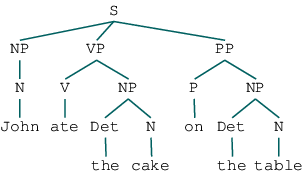

In [139]:
results[0]

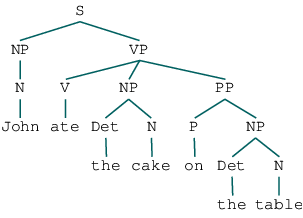

In [134]:
results[1]

- https://www.nltk.org/book/ch08.html
- https://stackoverflow.com/questions/52107352/how-can-i-pretty-print-a-nltk-tree-object